# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_csv("data/food_consumption.csv")
food

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [3]:
food.groupby('food_category').describe()[['consumption']]['consumption','50%'].sort_values(ascending=False).head(1)

food_category
dairy    110.975
Name: (consumption, 50%), dtype: float64

2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

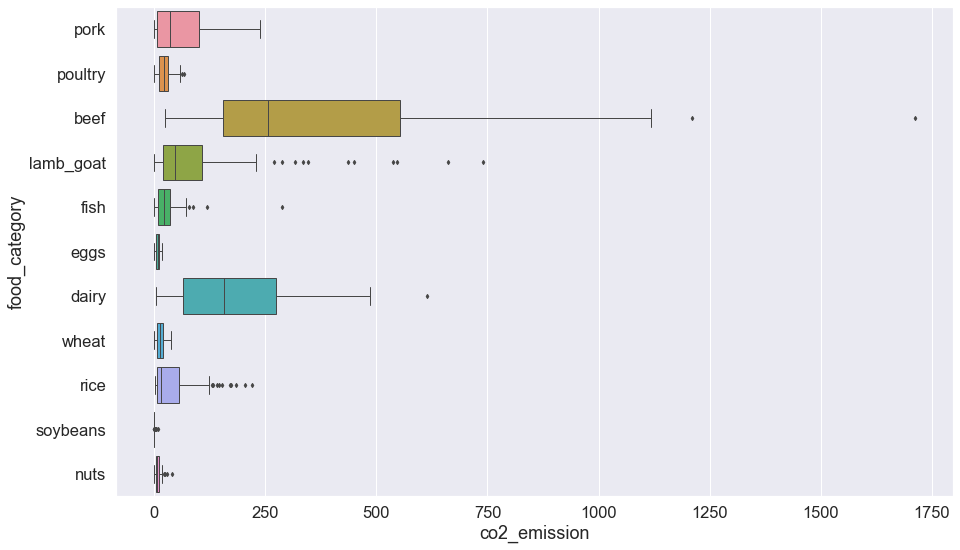

In [4]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

In [5]:
food_cat = food["food_category"].unique()
iqrs = {}
for val in food_cat:
    food_categ = food[food["food_category"] == val]["co2_emission"]
    q1, q3 = np.percentile(food_categ, [25, 75])
    iqr_range = q3 - q1
    print(f"IQR of {val} is: {iqr_range}")
    iqrs[val] = iqr_range
print("__________________________________________")
print(f"The food category that has the highest IQR is {max(iqrs, key=iqrs.get)} with: {max(iqrs.values())}")

IQR of pork is: 92.52
IQR of poultry is: 20.230000000000004
IQR of beef is: 399.37749999999994
IQR of lamb_goat is: 89.03750000000001
IQR of fish is: 25.27
IQR of eggs is: 7.6850000000000005
IQR of dairy is: 209.2725
IQR of wheat is: 12.645000000000001
IQR of rice is: 49.55
IQR of soybeans is: 0.29
IQR of nuts is: 6.734999999999999
__________________________________________
The food category that has the highest IQR is beef with: 399.37749999999994


3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

In [6]:
food_cat = food["food_category"].unique()
medians = {}
for val in food_cat:
    food_categ = food[food["food_category"] == val]["co2_emission"]
    median = np.median(food_categ)
    print(f"Median of {val} is: {median}")
    medians[val] = median
print("__________________________________________")
print(f"The food category that has the highest median of co2_emission value is {max(medians, key=medians.get)} with: {max(medians.values())}")
    

Median of pork is: 36.650000000000006
Median of poultry is: 21.325
Median of beef is: 255.655
Median of lamb_goat is: 46.405
Median of fish is: 22.27
Median of eggs is: 7.734999999999999
Median of dairy is: 158.075
Median of wheat is: 13.24
Median of rice is: 15.2
Median of soybeans is: 0.035
Median of nuts is: 6.1850000000000005
__________________________________________
The food category that has the highest median of co2_emission value is beef with: 255.655


4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

$$\begin{gather}        
H_0: \mu \text{ consumption}_{poultry}
= \mu \text{ consumption}_{fish} 
\\        
H_1: \mu \text{ consumption}_{poultry}
\ne \mu \text{ consumption}_{fish}
\end{gather}$$

In [7]:
poultry_cons = food[food["food_category"] == "poultry"][["food_category", "consumption"]]
fish_cons = food[food["food_category"] == "fish"][["food_category", "consumption"]]

permutation_df = pd.concat([fish_cons, poultry_cons])
permutation_df.reset_index(drop=True)

,food_category,consumption
0,fish,4.36
1,fish,17.69
2,fish,3.85
3,fish,74.41
4,fish,20.36
...,...,...
255,poultry,4.97
256,poultry,4.96
257,poultry,7.50
258,poultry,8.91


In [8]:
mu_poultry = float(round(np.mean(poultry_cons), 2))
mu_fish = float(round(np.mean(fish_cons), 2))
mu_diff = mu_poultry - mu_fish

print("Observed test statistic: ", round(mu_diff, 2))

Observed test statistic:  3.93


D:\Programmi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\Programmi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
n = 20000
mu_diff_samples = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    df_sample1 = permutation_df.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(permutation_df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    df_sample2 = permutation_df.loc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

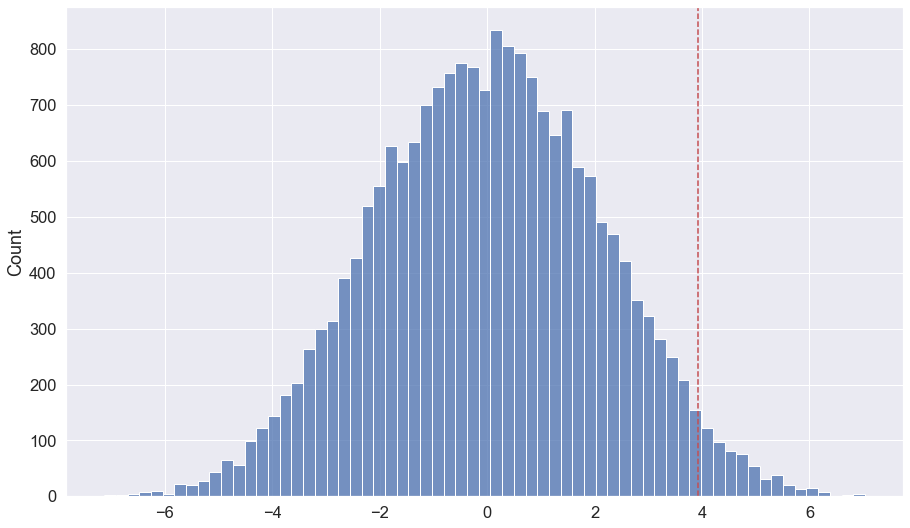

In [10]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()

In [11]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))

p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 595
Total results: 20000
p-value: 595 / 20000 = 0.02975


In [12]:
alpha = 0.05

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 rejected: the observed result is statistically significant | p-value <= alpha


#### Conclusions

Assuming that, there is no difference between the average consumption of poultry and fish, using a significance level of 5%, the calculated p-value (simulated test statistic under null hypothesis) there is a possibility of **2.9%** of obtaining extreme values at least as much as the actual observed result, and therefore observing a difference between the two averages.

### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [13]:
happy = pd.read_csv("data/world_happiness.csv")
happy

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151
...,...,...,...,...,...,...,...,...
138,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
139,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
140,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
141,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

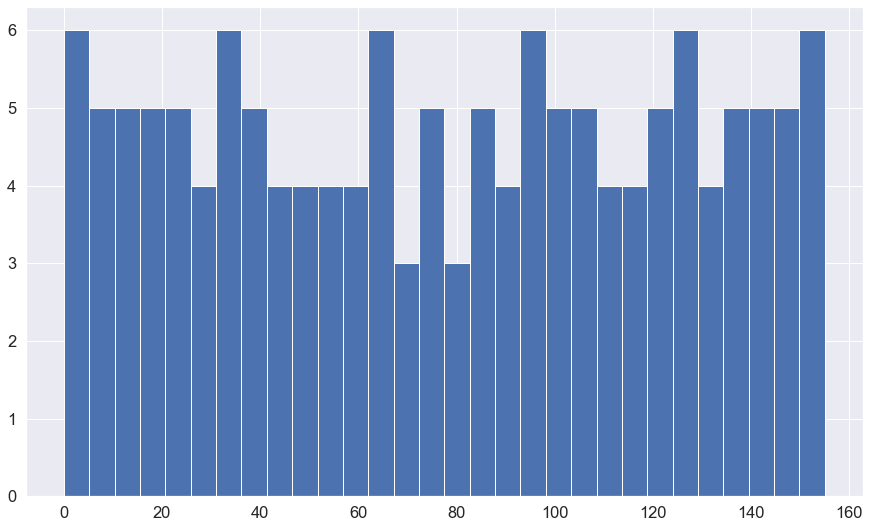

In [14]:
plt.hist(happy["happiness_score"], bins=30)
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [15]:
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


<AxesSubplot:>

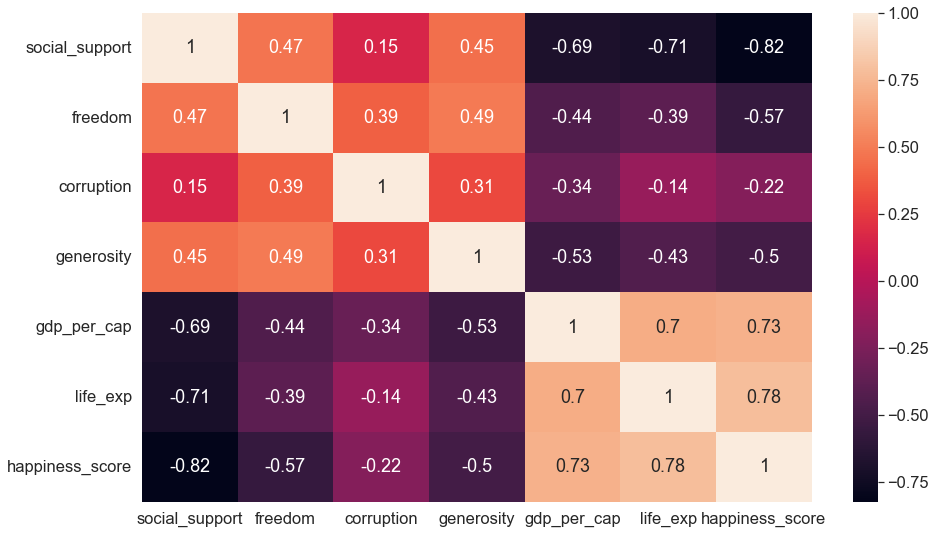

In [16]:
sns.heatmap(happy.corr(), annot=True)

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [17]:
happy[happy["corruption"].isnull()]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [18]:
for col in happy.columns:
    if col != "country":
        happy[col].fillna((happy[col].mean()), inplace=True)
    else:
        pass
        
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

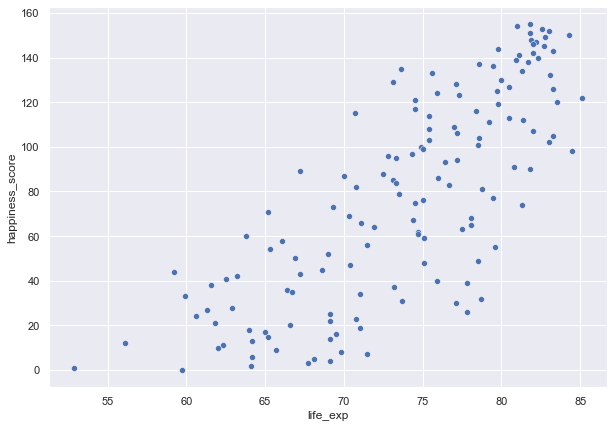

In [19]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()

In [20]:
import statsmodels.api as sm

Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X) 

model = sm.OLS(endog=Y,exog=X) # definiamo il modello
results = model.fit() # stimiamo la retta di regressione

In [21]:
results_as_html = results.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_df['coef'][0], results_df['coef'][1]
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -298.871
Slope: 5.1021


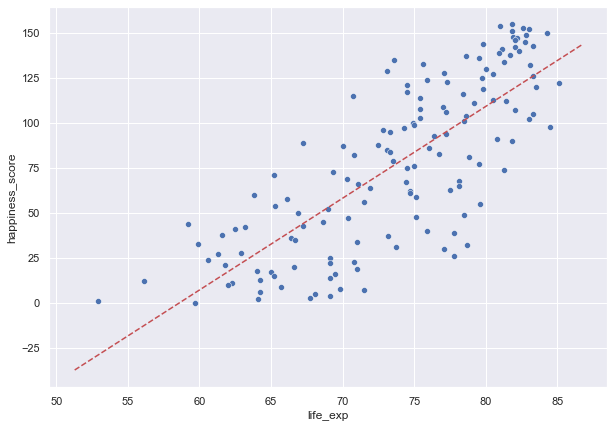

In [33]:
#Mostriamo la retta di regressione
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + (slope * x_vals)   # eq of the regression line

plt.plot(x_vals, y_vals, '--', color='r')     # draw regression line on scatterplot
plt.show()

$$       
\text{happiness_score} = -298.871 + 5.1021 \times \text{life_exp} \\
\text{happiness_score} + 298.871 = 5.1021 \times \text{life_exp}
$$

In [23]:
round(abs(results.predict(np.array([1, 1]))[0]) - abs(results.predict(np.array([1, 2]))[0]), 3)

5.102

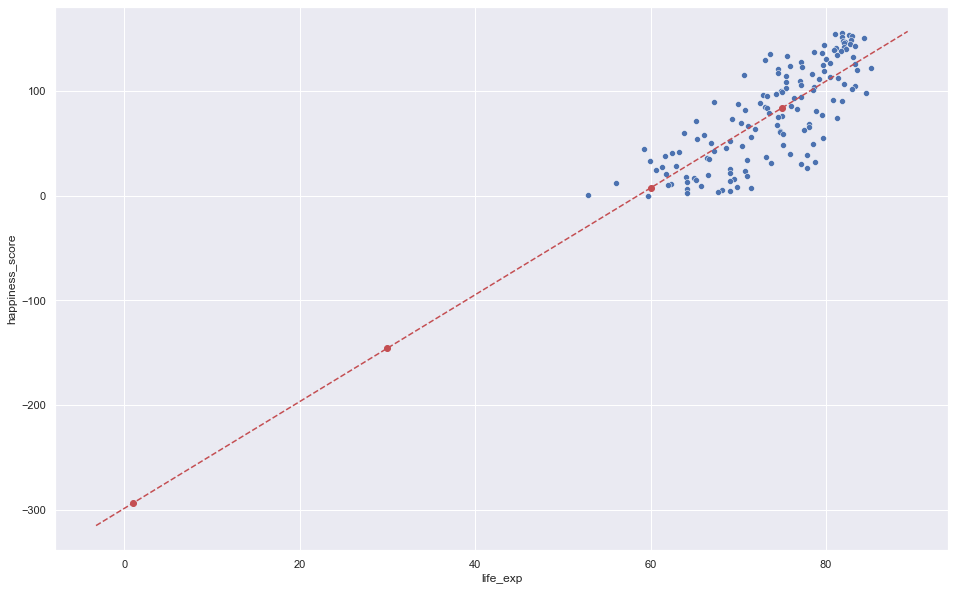

In [24]:
sns.set(rc={'figure.figsize':(16, 10)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)


# calculate some predictions
plt.plot(1, results.predict(np.array([1, 1]))[0], 'ro')
plt.plot(30, results.predict(np.array([1, 30]))[0], 'ro')
plt.plot(60, results.predict(np.array([1, 60]))[0], 'ro')
plt.plot(75, results.predict(np.array([1, 75]))[0], 'ro')

axes = plt.gca()

x_vals = np.array(axes.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, '--', color='r')
plt.show()

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [25]:
happy.corr()['happiness_score'].sort_values(ascending=False)[['happiness_score','social_support', 'freedom', 'generosity', 'life_exp']]

happiness_score    1.000000
social_support    -0.821384
freedom           -0.565298
generosity        -0.497250
life_exp           0.780225
Name: happiness_score, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           3.39e-29
Time:                        08:04:51   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_test = sm.OLS(y_test,X_test)
results_test = model_test.fit()
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     50.64
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.01e-15
Time:                        08:04:51   Log-Likelihood:                -209.39
No. Observations:                  48   AIC:                             428.8
Df Residuals:                      43   BIC:                             438.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.6747     49.345     -2.952      0.005    -245.188     -46.161
social_support    -0.3854      0.102     -3.791      0.000      -0.590      -0.180
freedom           -0.2358      0.080     -2.933      0.005      -0.398      -0.074
generosity        -0.0066      0.082     -0.080      0.936      -0.172       0.159
life_exp           3.6813      0.589      6.251      0.000       2.494       4.869
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.815
Skew:                          -0.292   Prob(JB):                        0.404
Kurtosis:                       2.248   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.**

**Overfitting is a common cause for poor generalization if we have a decisively high R-squared value of the model
In our case, R-squared value of training set is good, so the model doesn't overfitting the training data.**

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [29]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [30]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.54


### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

In [31]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

ModuleNotFoundError: No module named 'prophet'